# Importing the file

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(r"C:\Users\pc\OneDrive\Documents\Python_DA\weather_analysis\data\weather_dataset.csv")

#### Let's take a look

In [4]:
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [5]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [6]:
data.shape

(8784, 8)

In [7]:
data.index

RangeIndex(start=0, stop=8784, step=1)

In [8]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [9]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [10]:
data['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [11]:
data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [12]:
data['Weather'].value_counts() # the weather was mainly clear most of the time throughout this data

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


# Analyzing the data

### Find out all the null values

In [14]:
data.isnull().sum() # shows that no column has null values

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

### Renaming

In [15]:
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [16]:
data.rename(columns = {'Temp_C' : 'temp', 'Date/Time' : 'date','Dew Point Temp_C' : 'dew_point_temp', 'Rel Hum_%' : 'rel_hum', 'Wind Speed_km/h' : 'wind_speed', 'Visibility_km' : 'visibility_km', 'Press_kPa':'press_kpa', 'Weather':'weather' }, inplace = True)

In [ ]:
# Fog formation conditions

fog_condition = data[data['weather'].str.contains("Fog")]
print("Average conditions for fog to occur: \n")
print(fog_condition[[ 'temp', 'dew_point_temp', 'rel_hum']].mean())


fog_condition['temp_dew_spread'] = fog_condition['temp'] - fog_condition['dew_point_temp']
print(f"\n Average temp-dew point spread during foggy days: {fog_condition['temp_dew_spread'].mean():.2f} degrees")



Average conditions for fog to occur: 

temp               4.915962
dew_point_temp     3.797418
rel_hum           92.521127
dtype: float64

 Average temp-dew point spread during foggy days: 1.12 degrees


C:\Users\pc\AppData\Local\Temp\ipykernel_8704\1512402234.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fog_condition['temp_dew_spread'] = fog_condition['temp'] - fog_condition['dew_point_temp']


In [ ]:
# When is visibility the poorest

low_visibility = data[data['visibility_km'] < 5]
print("Most frequent weather condition when the visibility is low: \n")
print(low_visibility['weather'].value_counts().head())

# Average conditions when visibility is low

print(f"\nAverage weather conditions when visibility is low: \n")
print(low_visibility[['dew_point_temp', 'temp', 'rel_hum']].mean())

# We can see that visibility is lowest during the colder weathers (Snowing)



Most frequent weather condition when the visibility is low: 

weather
Snow           145
Fog             50
Drizzle,Fog     46
Rain,Fog        32
Snow,Fog        25
Name: count, dtype: int64

Average weather conditions when visibility is low: 

dew_point_temp    -2.103175
temp              -0.474868
rel_hum           88.767196
dtype: float64


# Real Visualizations

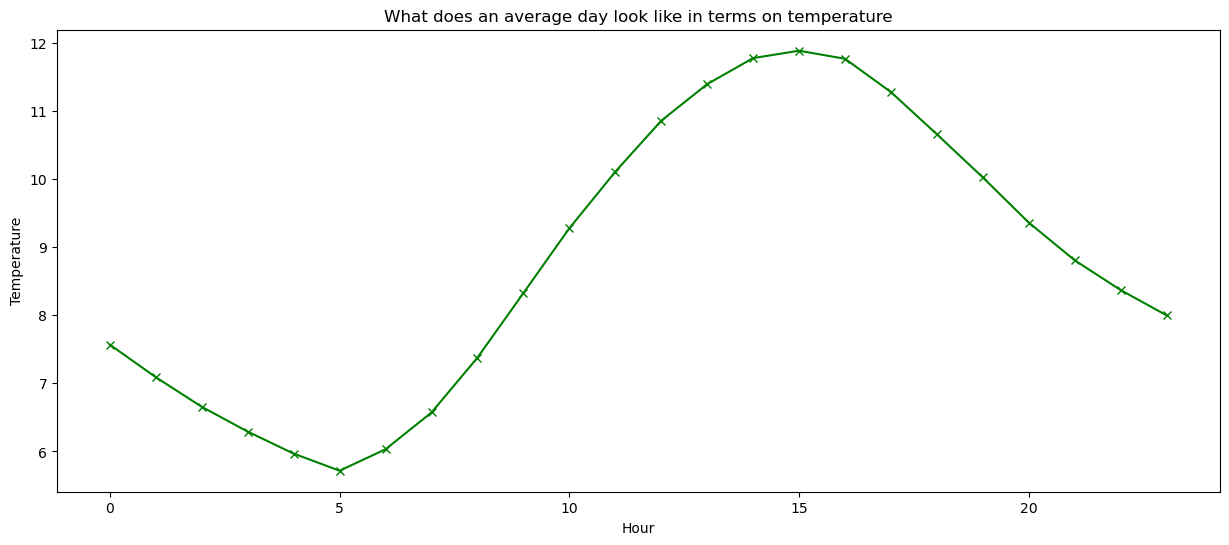

In [17]:
# What does an average day look like in terms of Temperature

data['hour'] = pd.to_datetime(data['date']).dt.hour
avg_temp = data.groupby('hour')['temp'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize = (15, 6))
avg_temp.plot(kind = 'line', marker = 'x', color = 'green')
plt.title("What does an average day look like in terms on temperature")
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.show()

original_columns = ['date', 'temp', 'dew_point_temp', 'rel_hum', 'wind_speed', 'visibility_km', 'press_kpa', 'weather']
data = data[original_columns]

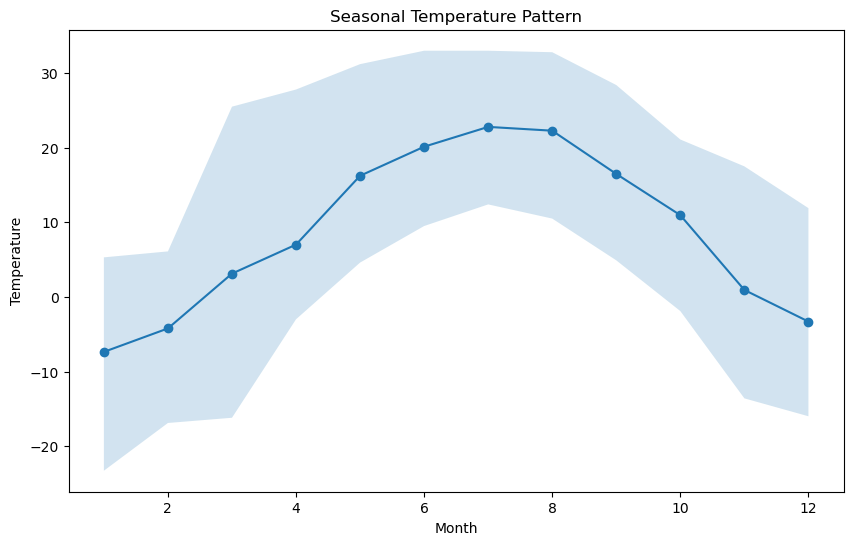

In [18]:
# Seasonal Temperature Trends 

data['month'] = pd.to_datetime(data['date']).dt.month
monthly_avg = data.groupby('month')['temp'].agg(['mean', 'min', 'max'])

plt.figure(figsize = (10, 6))
plt.plot(monthly_avg.index, monthly_avg['mean'], marker = 'o', label = 'average')
plt.fill_between(monthly_avg.index, monthly_avg['min'], monthly_avg['max'], alpha = 0.2)
plt.title('Seasonal Temperature Pattern')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

# We see that mid-year is the hottest time of the year


original_columns = ['date', 'temp', 'dew_point_temp', 'rel_hum', 'wind_speed', 'visibility_km', 'press_kpa', 'weather']
data = data[original_columns]

<Axes: >

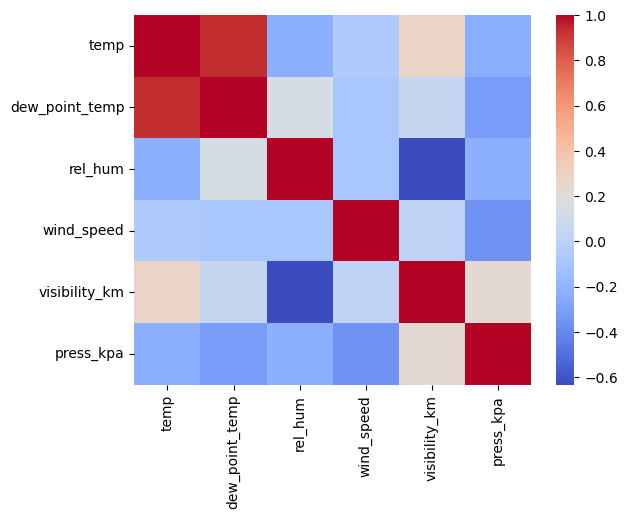

In [ ]:
# How each factors are related to each other 

import seaborn as sns

corr_matrix = data.select_dtypes(include = 'number').corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm')

# dew point temperature and temperature seems to be the most related columns

wind_category
Calm      4837
Breezy    3199
Windy      395
Storm       44
Name: count, dtype: int64


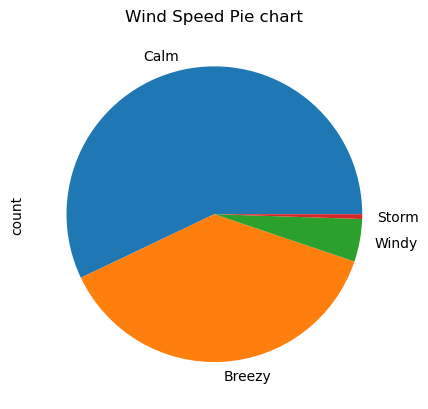

In [ ]:
# Wind speed throughout the year

import matplotlib.pyplot as plt

data['wind_category'] = pd.cut(data['wind_speed'], bins = [0, 15, 30, 45, 100], labels = ['Calm', 'Breezy', 'Windy', "Storm"])

count = data['wind_category'].value_counts()
count.plot(kind = 'pie')
plt.title('Wind Speed Pie chart')
print(count)


# The pie chart shows us that in 2012, most days had a calm wind speed 

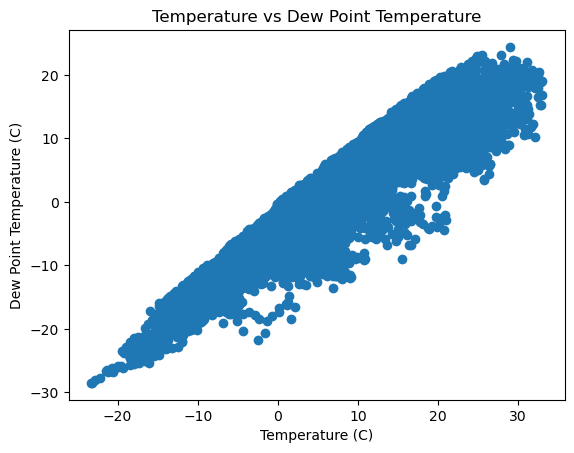

In [ ]:
# Relationship between temperature and dew point temperature

plt.scatter(data['temp'], data['dew_point_temp'])
plt.xlabel('Temperature (C)')
plt.ylabel('Dew Point Temperature (C)')
plt.title('Temperature vs Dew Point Temperature')
plt.show()

# We can see that as temperature increase dew point temperature also increases

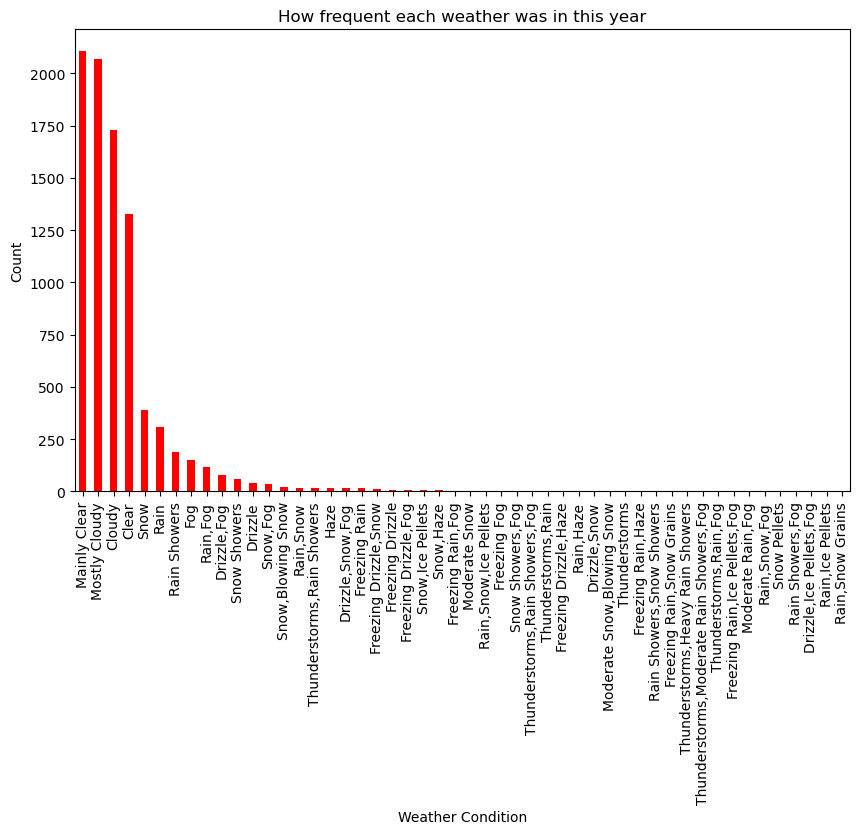

In [ ]:
# How frequent was each weather in 2012

import matplotlib.pyplot as plt

weather_counts = data['weather'].value_counts()
plt.figure(figsize=(10, 6))
weather_counts.plot(kind = 'bar', color = 'red')
plt.title('How frequent each weather was in this year')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

# Most days were clear or cloudy


# Visualisations

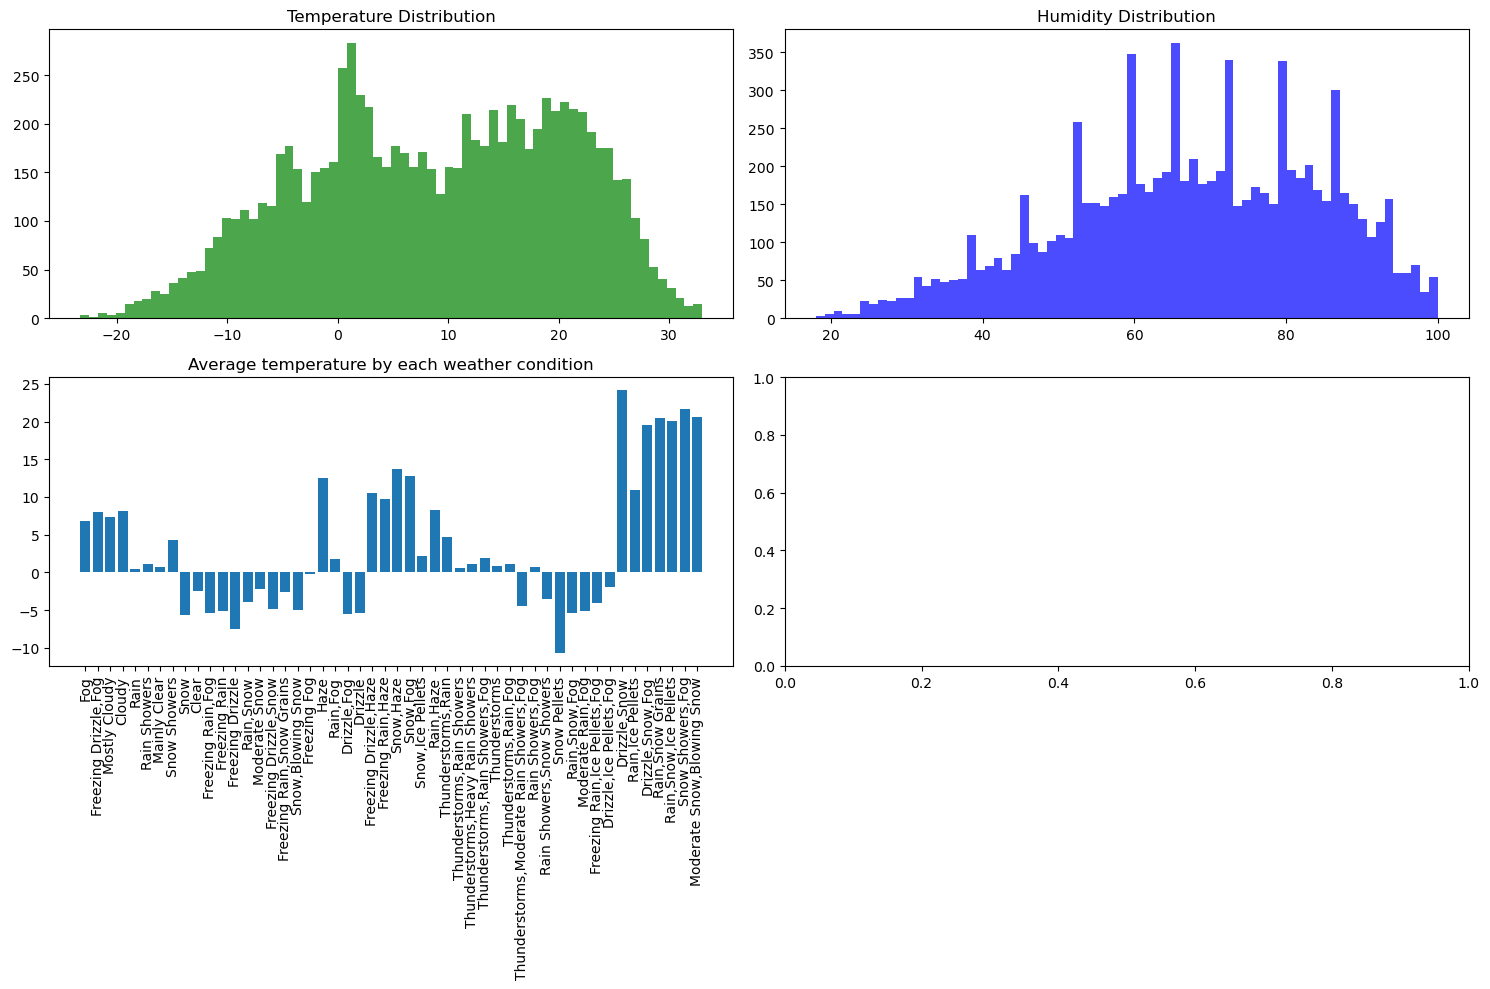

In [21]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))


# Temperature histogram 
ax1.hist(data['temp'], bins = 70, color = 'green', alpha = 0.7)
ax1.set_title('Temperature Distribution')


# Humidity histogram 
ax2.hist(data['rel_hum'], bins = 70, color = 'blue', alpha = 0.7)
ax2.set_title('Humidity Distribution')


mean = data.groupby('weather')['temp'].mean()
ax3.bar(range(len(mean)), mean)
ax3.set_xticks(range(len(mean)))
ax3.set_xticklabels(data['weather'].unique(), rotation = 90)
ax3.set_title('Average temperature by each weather condition')



plt.tight_layout()
plt.show()


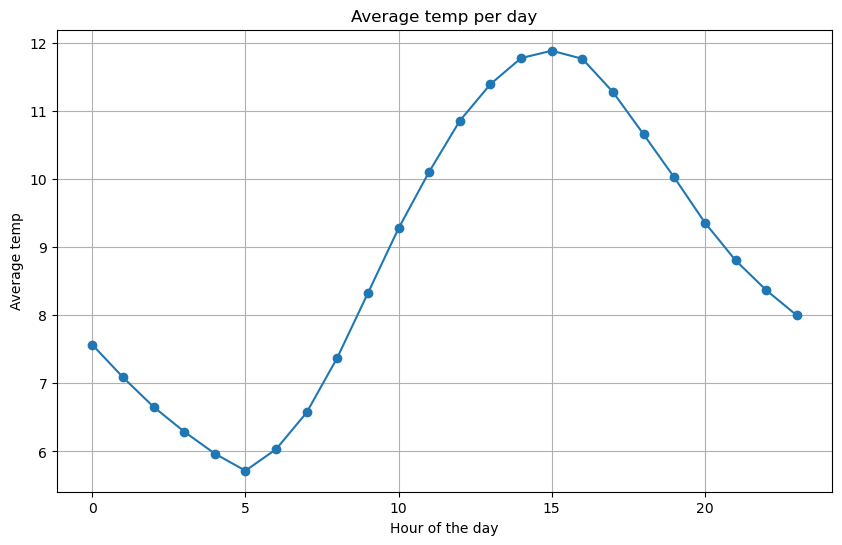

In [22]:
data['hour'] = pd.to_datetime(data['date']).dt.hour 
hourly_avg_temp = data.groupby('hour')['temp'].mean()

plt.figure(figsize = (10, 6))
hourly_avg_temp.plot (kind = 'line', marker = 'o')
plt.title('Average temp per day')
plt.xlabel('Hour of the day')
plt.ylabel('Average temp')
plt.grid(True)

wind_category
Calm      4837
Breezy    3199
Windy      395
Storm       44
Name: count, dtype: int64


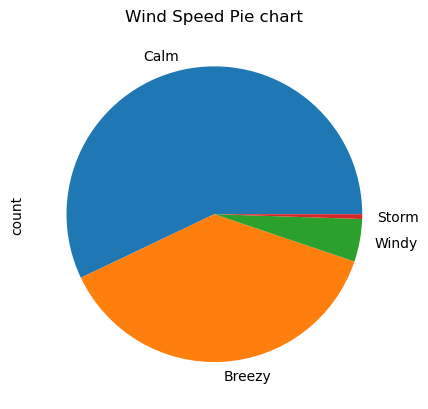

In [142]:
import matplotlib.pyplot as plt

data['wind_category'] = pd.cut(data['wind_speed'], bins = [0, 15, 30, 45, 100], labels = ['Calm', 'Breezy', 'Windy', "Storm"])

count = data['wind_category'].value_counts()
count.plot(kind = 'pie')
plt.title('Wind Speed Pie chart')
print(count)

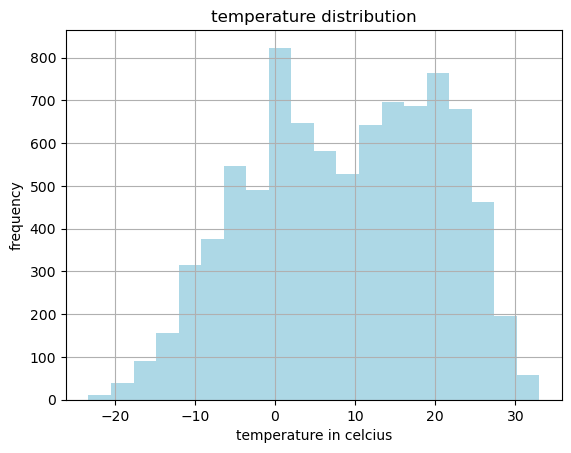

In [24]:
import matplotlib.pyplot as plt

data['temp'].hist(bins=20, color='lightblue')
plt.title('temperature distribution')   
plt.xlabel('temperature in celcius')
plt.ylabel('frequency')
plt.show()


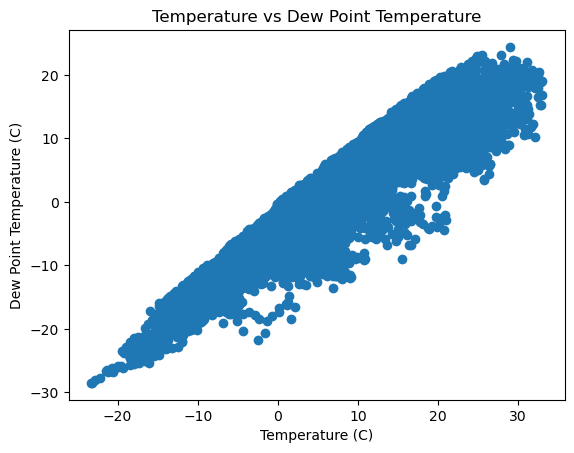

In [25]:
plt.scatter(data['temp'], data['dew_point_temp'])
plt.xlabel('Temperature (C)')
plt.ylabel('Dew Point Temperature (C)')
plt.title('Temperature vs Dew Point Temperature')
plt.show()

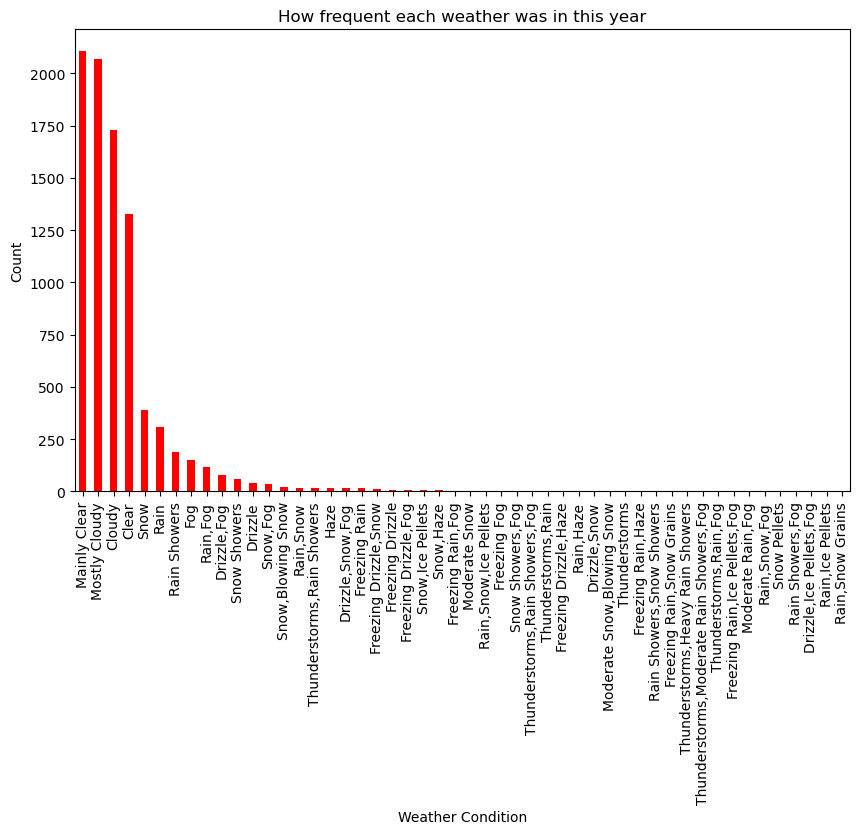

In [26]:
import matplotlib.pyplot as plt

weather_counts = data['weather'].value_counts()
plt.figure(figsize=(10, 6))
weather_counts.plot(kind = 'bar', color = 'red')
plt.title('How frequent each weather was in this year')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()


<Figure size 1200x600 with 0 Axes>

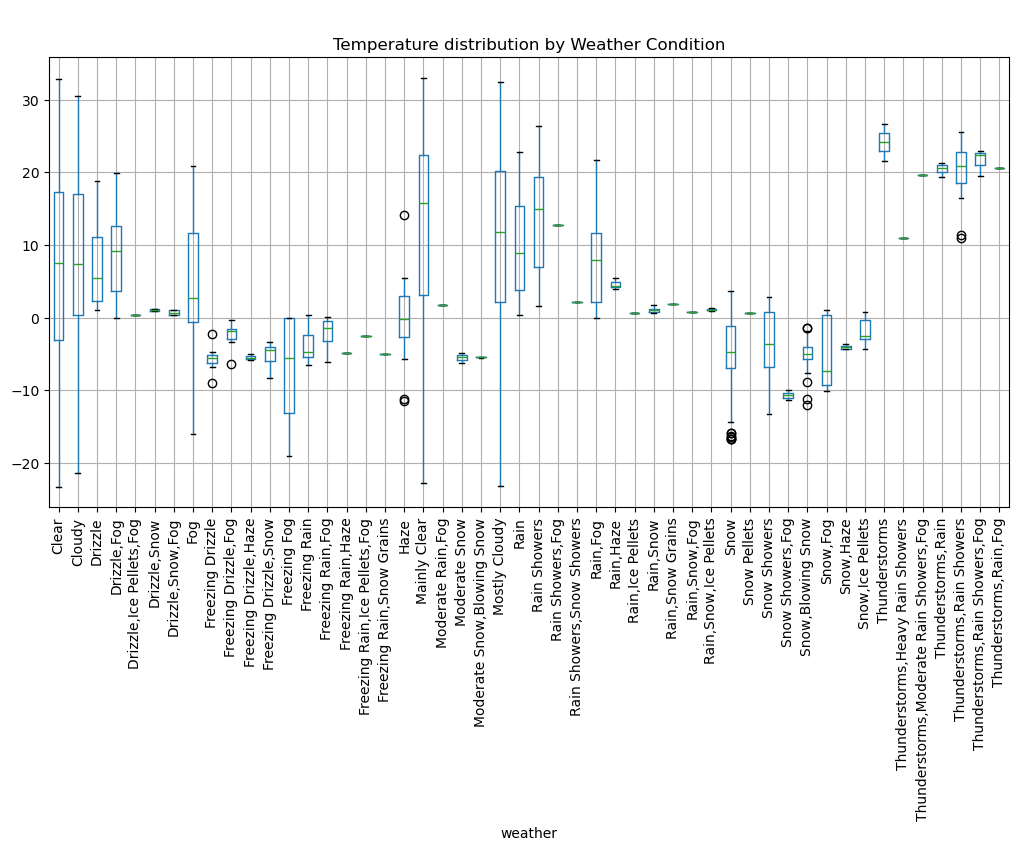

In [27]:
plt.figure(figsize = (12, 6))
data.boxplot(column = 'temp', by = 'weather', figsize = (12, 6))
plt.suptitle(' ')
plt.title ('Temperature distribution by Weather Condition')
plt.xticks(rotation = 90)
plt.show()

# for practice 

### what is the mean value of each column against each weather condition

In [28]:
data.groupby('weather').mean(numeric_only = True)

,temp,dew_point_temp,rel_hum,wind_speed,visibility_km,press_kpa,hour
weather,,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443,10.071644
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441,11.566551
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366,13.829268
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625,12.737500
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000,9.000000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000,16.500000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333,8.133333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067,8.973333
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857,6.285714


### where wind speed has been exactly 4kmph

In [29]:
print(data.temp.describe())

print(f"Average temperature is {data.temp.mean()}")
print(f"Minimum is {data.temp.min()}")
print(f"Maximum temperature is {data.temp.max()}")


count    8784.000000
mean        8.798144
std        11.687883
min       -23.300000
25%         0.100000
50%         9.300000
75%        18.800000
max        33.000000
Name: temp, dtype: float64
Average temperature is 8.798144353369764
Minimum is -23.3
Maximum temperature is 33.0


In [30]:
two_columns = data[['temp', 'rel_hum']] # printing the columns temperature and relative humidity
print (two_columns)

      temp  rel_hum
0     -1.8       86
1     -1.8       87
2     -1.8       89
3     -1.5       88
4     -1.5       88
...    ...      ...
8779   0.1       81
8780   0.2       83
8781  -0.5       93
8782  -0.2       89
8783   0.0       86

[8784 rows x 2 columns]


In [31]:
cold_days = data[data['temp'] < 0 ]
print (len(cold_days))

2164


In [32]:
weather_counts = data['weather'].value_counts() # counting the number of times each weather condition has occured
print(weather_counts)

weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [33]:
low_speed = data[data['wind_speed'] < 30]
mid_speed = data[(data['wind_speed'] >= 30) & (data['wind_speed'] < 55)]
high_speed = data[(data['wind_speed'] <= 83) & (data['wind_speed'] > 55)]

print(len(low_speed), len(mid_speed), len(high_speed))

print(len(low_speed)+ len(mid_speed)+ len(high_speed))


8184 592 8
8784


In [34]:
sorted_temp = data['wind_speed'].sort_values(ascending=False) # sorting the wind speed in descending order (LIKE ORDER BY IN SQL)
print(sorted_temp.head(10))

409     83
410     70
1504    63
1505    57
1503    57
1510    57
672     57
411     57
7271    54
2715    52
Name: wind_speed, dtype: int64


In [35]:
data.isnull().sum() # checking if there are any null values

date                0
temp                0
dew_point_temp      0
rel_hum             0
wind_speed          0
visibility_km       0
press_kpa           0
weather             0
hour                0
wind_category     309
dtype: int64

In [36]:
avg_temp_weather = data.groupby('weather')['wind_speed'].mean().sort_values(ascending = False)  # finding the average windpseed for each weather condition
print (avg_temp_weather.head(50))

weather
Moderate Snow,Blowing Snow                 40.000000
Snow Pellets                               35.000000
Snow,Blowing Snow                          34.842105
Moderate Snow                              33.750000
Freezing Rain,Snow Grains                  32.000000
Rain,Snow                                  28.388889
Freezing Rain,Ice Pellets,Fog              28.000000
Rain,Snow Grains                           26.000000
Rain,Ice Pellets                           24.000000
Snow,Ice Pellets                           23.833333
Rain,Snow,Ice Pellets                      23.250000
Rain Showers,Snow Showers                  22.500000
Snow                                       20.038462
Drizzle,Ice Pellets,Fog                    20.000000
Thunderstorms,Rain Showers,Fog             19.666667
Rain                                       19.254902
Snow Showers                               19.233333
Freezing Rain                              19.214286
Thunderstorms,Rain,Fog                

In [37]:
numerical_df = data.select_dtypes(include= ['number'])
correlation = numerical_df.corr()
print(correlation)

                    temp  dew_point_temp   rel_hum  wind_speed  visibility_km  \
temp            1.000000        0.932714 -0.220182   -0.061876       0.273455   
dew_point_temp  0.932714        1.000000  0.139494   -0.095685       0.050813   
rel_hum        -0.220182        0.139494  1.000000   -0.092743      -0.633683   
wind_speed     -0.061876       -0.095685 -0.092743    1.000000       0.004883   
visibility_km   0.273455        0.050813 -0.633683    0.004883       1.000000   
press_kpa      -0.236389       -0.320616 -0.231424   -0.356613       0.231847   
hour            0.106888        0.017201 -0.243502    0.077594       0.064385   

                press_kpa      hour  
temp            -0.236389  0.106888  
dew_point_temp  -0.320616  0.017201  
rel_hum         -0.231424 -0.243502  
wind_speed      -0.356613  0.077594  
visibility_km    0.231847  0.064385  
press_kpa        1.000000 -0.030344  
hour            -0.030344  1.000000  


In [38]:
weather_stats = data.groupby('weather').agg({
    'temp' : ['min', 'max'],
    'wind_speed': ['mean', 'std'],
    'press_kpa': ['mean'],
})
print(weather_stats)


                                         temp       wind_speed             \
                                          min   max       mean        std   
weather                                                                     
Clear                                   -23.3  32.8  10.557315   6.725291   
Cloudy                                  -21.4  30.5  16.127315   8.416282   
Drizzle                                   1.1  18.8  16.097561   6.456798   
Drizzle,Fog                               0.0  19.9  11.862500   6.289923   
Drizzle,Ice Pellets,Fog                   0.4   0.4  20.000000        NaN   
Drizzle,Snow                              0.9   1.2  14.000000   7.071068   
Drizzle,Snow,Fog                          0.3   1.1  15.533333   9.287985   
Fog                                     -16.0  20.8   7.946667   4.572733   
Freezing Drizzle                         -9.0  -2.3  16.571429   7.502381   
Freezing Drizzle,Fog                     -6.4  -0.3  17.000000  11.541230   

In [39]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['day_of_week'] = data['date'].dt.day_name()
data['year'] = data['date'].dt.year

print (f"Day of the week: ")
print(data['day_of_week'].value_counts())

Day of the week: 
day_of_week
Sunday       1272
Monday       1272
Tuesday      1248
Wednesday    1248
Thursday     1248
Friday       1248
Saturday     1248
Name: count, dtype: int64


In [40]:
data['date'].describe()

count                   8784
mean     2012-07-01 23:30:00
min      2012-01-01 00:00:00
25%      2012-04-01 11:45:00
50%      2012-07-01 23:30:00
75%      2012-10-01 11:15:00
max      2012-12-31 23:00:00
Name: date, dtype: object

In [41]:
data.groupby('weather')['temp'].mean().sort_values(ascending = False)

weather
Thunderstorms                              24.150000
Thunderstorms,Rain Showers,Fog             21.600000
Thunderstorms,Rain,Fog                     20.600000
Thunderstorms,Rain                         20.433333
Thunderstorms,Rain Showers                 20.037500
Thunderstorms,Moderate Rain Showers,Fog    19.600000
Rain Showers                               13.722340
Rain Showers,Fog                           12.800000
Mainly Clear                               12.558927
Thunderstorms,Heavy Rain Showers           10.900000
Mostly Cloudy                              10.574287
Rain                                        9.786275
Rain,Fog                                    8.273276
Drizzle,Fog                                 8.067500
Cloudy                                      7.970544
Drizzle                                     7.353659
Clear                                       6.825716
Rain,Haze                                   4.633333
Fog                                   

In [42]:
# finding the day with the highest temperature

hottest_day = data[data['temp'] == data['temp'].max()]
print(hottest_day)


                    date  temp  dew_point_temp  rel_hum  wind_speed  \
4143 2012-06-21 15:00:00  33.0            19.0       44          24   
4695 2012-07-14 15:00:00  33.0            16.8       38          22   

      visibility_km  press_kpa       weather  hour wind_category  month  \
4143           24.1     100.20  Mainly Clear    15    very windy      6   
4695           48.3     101.31  Mainly Clear    15    very windy      7   

     day_of_week  year  
4143    Thursday  2012  
4695    Saturday  2012  


In [43]:
# counting how many foggy days there are in the data

foggy_days = data[data['weather'].str.contains('Fog')]
print(foggy_days)

                    date  temp  dew_point_temp  rel_hum  wind_speed  \
0    2012-01-01 00:00:00  -1.8            -3.9       86           4   
1    2012-01-01 01:00:00  -1.8            -3.7       87           4   
2    2012-01-01 02:00:00  -1.8            -3.4       89           7   
3    2012-01-01 03:00:00  -1.5            -3.2       88           6   
4    2012-01-01 04:00:00  -1.5            -3.3       88           7   
...                  ...   ...             ...      ...         ...   
8739 2012-12-30 03:00:00  -9.1           -10.4       90          11   
8740 2012-12-30 04:00:00  -9.3           -10.6       90          13   
8741 2012-12-30 05:00:00  -9.1           -10.4       90          11   
8742 2012-12-30 06:00:00  -9.3           -10.8       89          17   
8770 2012-12-31 10:00:00  -7.4            -8.9       89           4   

      visibility_km  press_kpa               weather  hour wind_category  \
0               8.0     101.24                   Fog     0          Cal

In [44]:
# calculate the range of temperature 

range_temp = data['temp'].max() - data['temp'].min()
print(range_temp)



56.3


In [45]:
# finding the average humidity on rainy days 

avg_humidity_rain = data[data['weather'].str.contains('Rain')] ['rel_hum'].mean()
print(avg_humidity_rain)

83.31930333817127


In [46]:
# finding the average temperature on the days that was clear

avg_temp_clear_days = data[data['weather'].str.contains('Clear')] ['temp'].mean()
print(avg_temp_clear_days)

# temp was on average around 10 degrees

10.343822843822844


In [47]:
# creating a list of all unique temperatures

temp_list = data['temp'].nunique()
print(temp_list)

# there are 533 unique temperature values in the whole dataset

533


In [48]:
fog_days = data[data['weather'].str.contains('Fog')]
clear_days = data[data['weather'].str.contains('Clear')]

print("Fog days stats: ")
print(fog_days[['temp', 'rel_hum']].describe())

print("\nClear days stats: ")
print(clear_days[['temp', 'rel_hum']].describe())

Fog days stats: 
             temp     rel_hum
count  426.000000  426.000000
mean     4.915962   92.521127
std      7.908579    4.601358
min    -19.000000   71.000000
25%      0.500000   89.000000
50%      3.800000   92.000000
75%     11.500000   97.000000
max     22.900000  100.000000

Clear days stats: 
              temp      rel_hum
count  3432.000000  3432.000000
mean     10.343823    62.147145
std      12.577530    16.035361
min     -23.300000    20.000000
25%       0.100000    51.000000
50%      13.100000    63.000000
75%      20.900000    74.000000
max      33.000000    99.000000


In [49]:
summary = pd.DataFrame ({
    'Average': data.mean(numeric_only = True), 
    'Standard Deviation': data.std(numeric_only = True), 
    'Minimum': data.min(numeric_only = True), 
    'Maximum' : data.max(numeric_only = True)
})

print("Summary Statistics: ")
print(f"\n {summary}")

Summary Statistics: 

                     Average  Standard Deviation  Minimum  Maximum
temp               8.798144           11.687883   -23.30    33.00
dew_point_temp     2.555294           10.883072   -28.50    24.40
rel_hum           67.431694           16.918881    18.00   100.00
wind_speed        14.945469            8.688696     0.00    83.00
visibility_km     27.664447           12.622688     0.20    48.30
press_kpa        101.051623            0.844005    97.52   103.65
hour              11.500000            6.922581     0.00    23.00
month              6.513661            3.451430     1.00    12.00
year            2012.000000            0.000000  2012.00  2012.00


In [50]:
# finding the days that are cold and humid

cold_humid = data[(data['temp'] < 0) & (data['rel_hum'] > 80)]

print(cold_humid[['temp', 'rel_hum', 'weather']].head())
print(f"\n {len(cold_humid)}")

# there are 543 days where its cold (< 0 degress) and the humidity is very high ( > 80 )

   temp  rel_hum               weather
0  -1.8       86                   Fog
1  -1.8       87                   Fog
2  -1.8       89  Freezing Drizzle,Fog
3  -1.5       88  Freezing Drizzle,Fog
4  -1.5       88                   Fog

 543


In [51]:
# finds out all the days that had rain and fog 

foggy_rainy = data[(data['weather'].str.contains('Rain')) | (data['weather'].str.contains('Fog'))]
foggy_rainy

,date,temp,dew_point_temp,rel_hum,wind_speed,visibility_km,press_kpa,weather,hour,wind_category,month,day_of_week,year
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0,Calm,1,Sunday,2012
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,Calm,1,Sunday,2012
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2,Breezy,1,Sunday,2012
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",3,Breezy,1,Sunday,2012
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4,Breezy,1,Sunday,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8739,2012-12-30 03:00:00,-9.1,-10.4,90,11,3.6,100.30,"Snow,Fog",3,windy,12,Sunday,2012
8740,2012-12-30 04:00:00,-9.3,-10.6,90,13,9.7,100.28,"Snow,Fog",4,windy,12,Sunday,2012
8741,2012-12-30 05:00:00,-9.1,-10.4,90,11,4.0,100.32,"Snow,Fog",5,windy,12,Sunday,2012
8742,2012-12-30 06:00:00,-9.3,-10.8,89,17,8.0,100.39,"Snow,Fog",6,very windy,12,Sunday,2012


In [52]:
# this does the same thing as above but uses a different method and this is for absolute values 

foggy_rainy = data[data['weather'].isin(['Fog', 'Rain'])]
foggy_rainy

,date,temp,dew_point_temp,rel_hum,wind_speed,visibility_km,press_kpa,weather,hour,wind_category,month,day_of_week,year
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0,Calm,1,Sunday,2012
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,Calm,1,Sunday,2012
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4,Breezy,1,Sunday,2012
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog,5,Breezy,1,Sunday,2012
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog,6,Breezy,1,Sunday,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8716,2012-12-29 04:00:00,-16.0,-17.2,90,6,9.7,101.25,Fog,4,Breezy,12,Saturday,2012
8717,2012-12-29 05:00:00,-14.8,-15.9,91,4,6.4,101.25,Fog,5,Calm,12,Saturday,2012
8718,2012-12-29 06:00:00,-13.8,-15.3,88,4,9.7,101.25,Fog,6,Calm,12,Saturday,2012
8719,2012-12-29 07:00:00,-14.8,-16.4,88,7,8.0,101.22,Fog,7,Breezy,12,Saturday,2012


In [53]:
# hottest_5 = data['temp'].sort_values(ascending = False)
# hottest_5

hottest_days = data.nlargest(5, 'temp')
print("Top 5 hottest days")
print(hottest_days[['date', 'weather', 'temp']])

Top 5 hottest days
                    date       weather  temp
4143 2012-06-21 15:00:00  Mainly Clear  33.0
4695 2012-07-14 15:00:00  Mainly Clear  33.0
4696 2012-07-14 16:00:00  Mainly Clear  32.9
5199 2012-08-04 15:00:00         Clear  32.8
4694 2012-07-14 14:00:00  Mainly Clear  32.7


In [54]:

print("Missing values before: ")
print(data.isnull().sum())

data_filled = data.fillna({
    'temp': data['temp'].mean(), 
    'rel_hum':data['rel_hum'].median()
})

Missing values before: 
date                0
temp                0
dew_point_temp      0
rel_hum             0
wind_speed          0
visibility_km       0
press_kpa           0
weather             0
hour                0
wind_category     309
month               0
day_of_week         0
year                0
dtype: int64


In [56]:
original_columns = ['date', 'temp', 'dew_point_temp', 'rel_hum', 'wind_speed', 'visibility_km', 'press_kpa', 'weather']
data = data[original_columns]


In [ ]:
common_weather = data.groupby('temp_range')['weather'].agg(lambda x: x.mode()[0])
common_weather

C:\Users\pc\AppData\Local\Temp\ipykernel_1052\1106671191.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  common_weather = data.groupby('temp_range')['weather'].agg(lambda x: x.mode()[0])


temp_range
(-23.356, -12.04]            Clear
(-12.04, -0.78]             Cloudy
(-0.78, 10.48]       Mostly Cloudy
(10.48, 21.74]        Mainly Clear
(21.74, 33.0]         Mainly Clear
Name: weather, dtype: object

In [57]:
data['hour'] = pd.to_datetime(data['date']).dt.hour

data['is_afternoon'] = data['hour'] >= 12
data['is_morning'] = data['hour'] < 12

morning_avg = data[data['is_morning']]['temp'].mean()
afternoon_avg = data[data['is_afternoon']]['temp'].mean()

print(f"Morning average: {morning_avg}")
print(f"Afternoon average: {afternoon_avg}")


Morning average: 7.249112021857923
Afternoon average: 10.347176684881603


C:\Users\pc\AppData\Local\Temp\ipykernel_8704\3429005528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = pd.to_datetime(data['date']).dt.hour
C:\Users\pc\AppData\Local\Temp\ipykernel_8704\3429005528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_afternoon'] = data['hour'] >= 12
C:\Users\pc\AppData\Local\Temp\ipykernel_8704\3429005528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [58]:
data.head(2)

,date,temp,dew_point_temp,rel_hum,wind_speed,visibility_km,press_kpa,weather,hour,is_afternoon,is_morning
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0,False,True
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,False,True


In [61]:
data.groupby('wind_speed').get_group(4)

,date,temp,dew_point_temp,rel_hum,wind_speed,visibility_km,press_kpa,weather,hour,is_afternoon,is_morning
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0,False,True
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,False,True
96,2012-01-05 00:00:00,-8.8,-11.7,79,4,9.7,100.32,Snow,0,False,True
101,2012-01-05 05:00:00,-7.0,-9.5,82,4,4.0,100.19,Snow,5,False,True
146,2012-01-07 02:00:00,-8.1,-11.1,79,4,19.3,100.15,Cloudy,2,False,True
...,...,...,...,...,...,...,...,...,...,...,...
8768,2012-12-31 08:00:00,-8.6,-10.3,87,4,3.2,101.14,Snow Showers,8,False,True
8769,2012-12-31 09:00:00,-8.1,-9.6,89,4,2.4,101.09,Snow,9,False,True
8770,2012-12-31 10:00:00,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog",10,False,True
8772,2012-12-31 12:00:00,-5.8,-7.5,88,4,12.9,100.78,Snow,12,True,False


# practicing visualisations

wind_category
very windy    3638
windy         2245
Breezy        2116
Calm           476
Name: count, dtype: int64


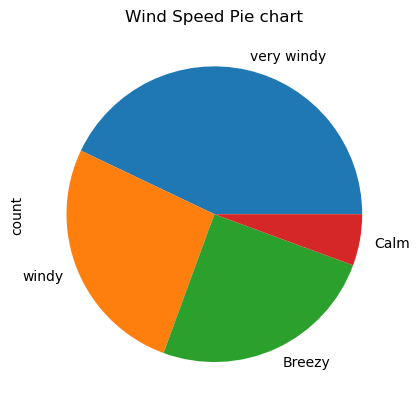

In [ ]:
data['wind_category'] = pd.cut(data['wind_speed'], bins = [0, 5, 10, 15, 100], labels = ['Calm', 'Breezy', 'windy', "very windy"])

count = data['wind_category'].value_counts()
count.plot(kind = 'pie')
plt.title('Wind Speed Pie chart')
print(count)

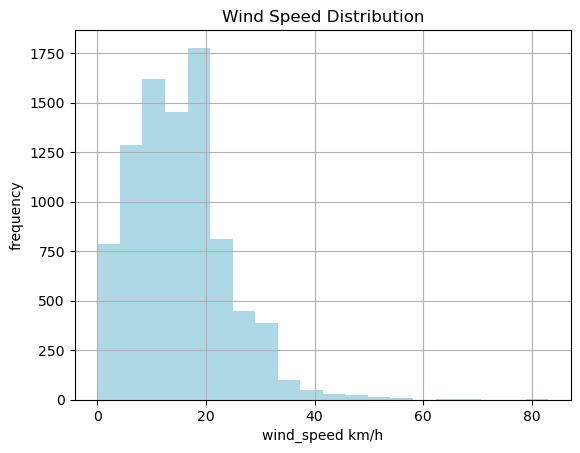

In [ ]:
data['wind_speed'].hist(bins=20, color='lightblue')
plt.title('Wind Speed Distribution')   
plt.xlabel('wind_speed km/h')
plt.ylabel('frequency')
plt.show()

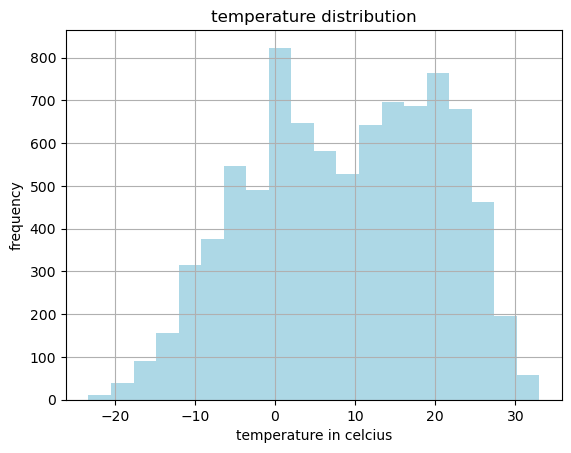

In [ ]:
import matplotlib.pyplot as plt

data['temp'].hist(bins=20, color='lightblue')
plt.title('temperature distribution')
plt.xlabel('temperature in celcius')
plt.ylabel('frequency')
plt.show()


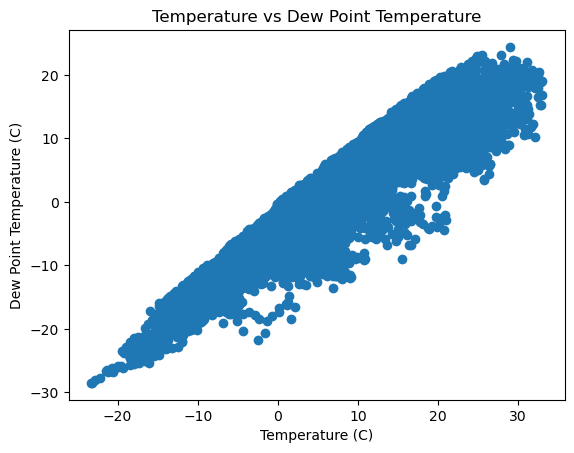

In [ ]:
plt.scatter(data['temp'], data['dew_point_temp'])
plt.xlabel('Temperature (C)')
plt.ylabel('Dew Point Temperature (C)')
plt.title('Temperature vs Dew Point Temperature')
plt.show()

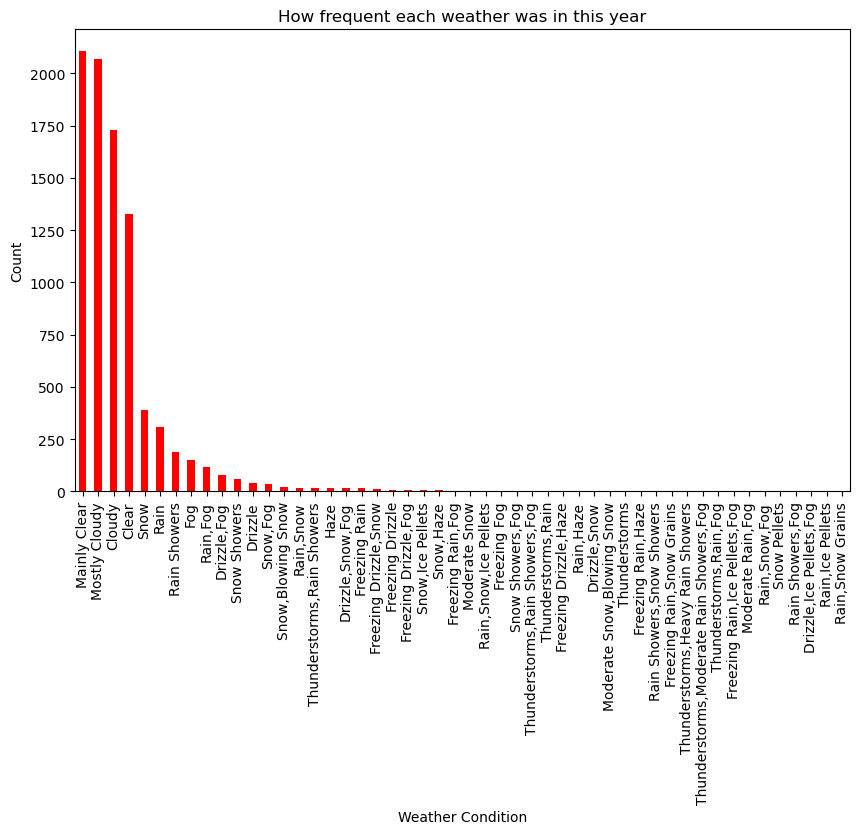

In [ ]:
import matplotlib.pyplot as plt

weather_counts = data['weather'].value_counts()
plt.figure(figsize=(10, 6))
weather_counts.plot(kind = 'bar', color = 'red')
plt.title('How frequent each weather was in this year')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()


<Figure size 1200x600 with 0 Axes>

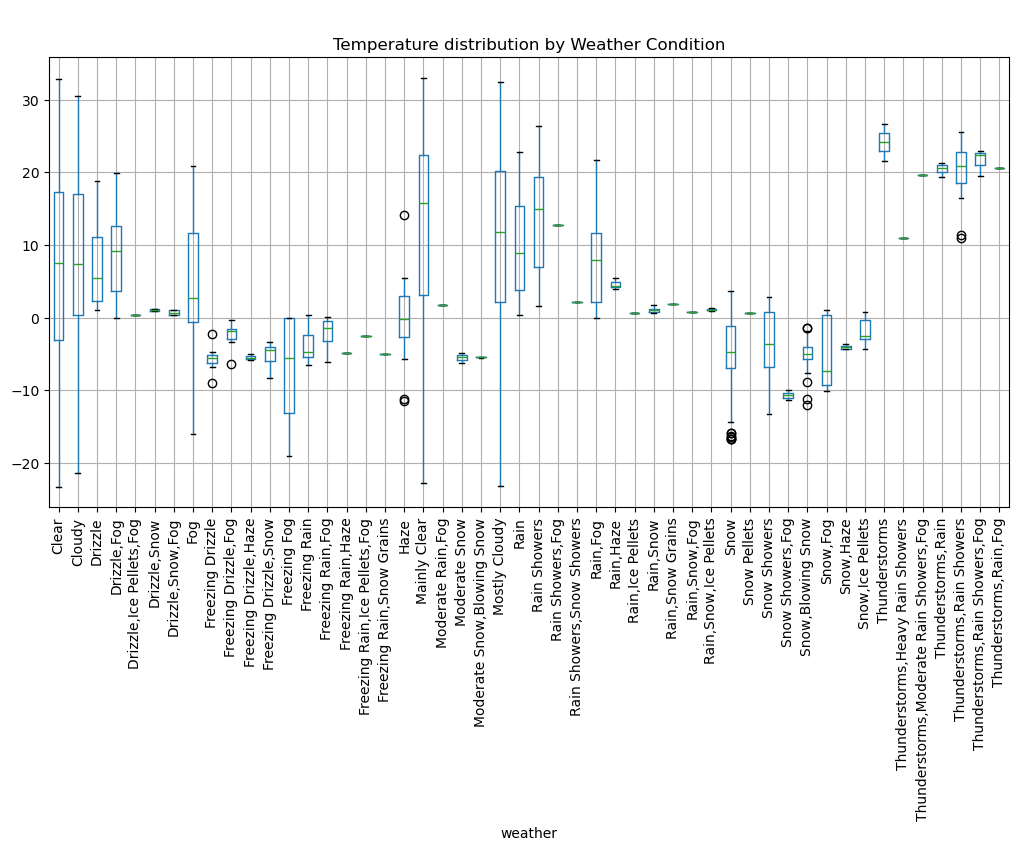

In [ ]:
plt.figure(figsize = (12, 6))
data.boxplot(column = 'temp', by = 'weather', figsize = (12, 6))
plt.suptitle(' ')
plt.title ('Temperature distribution by Weather Condition')
plt.xticks(rotation = 90)
plt.show()

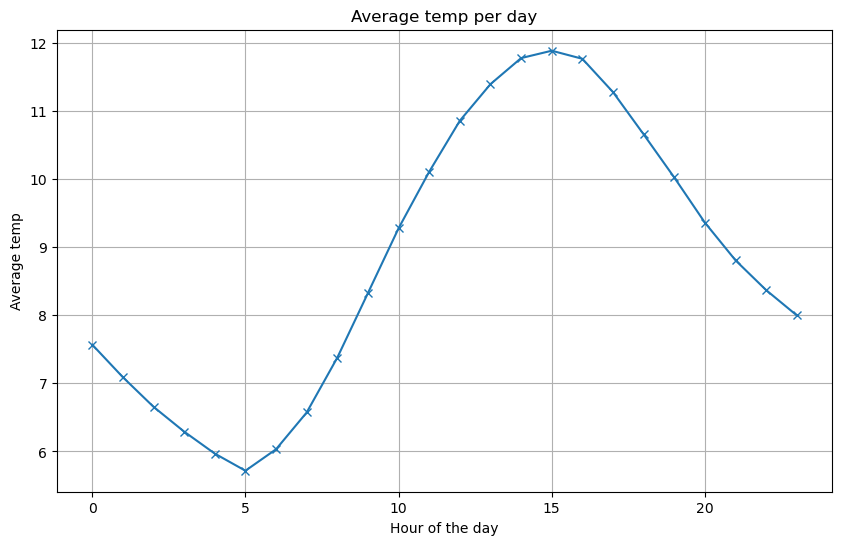

In [ ]:
data['hour'] = pd.to_datetime(data['date']).dt.hour 
hourly_avg_temp = data.groupby('hour')['temp'].mean()

plt.figure(figsize = (10, 6))
hourly_avg_temp.plot (kind = 'line', marker = 'x')
plt.title('Average temp per day')
plt.xlabel('Hour of the day')
plt.ylabel('Average temp')
plt.grid(True)

<Axes: >

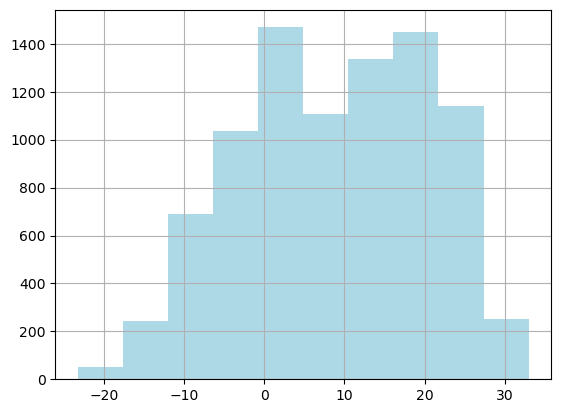

In [ ]:
data['temp'].hist(color='lightblue')


<Axes: >

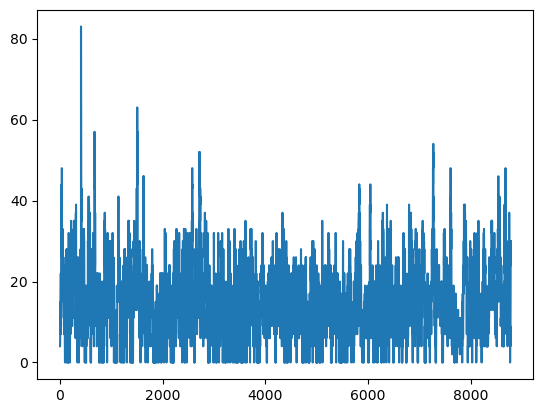

In [ ]:
data['wind_speed'].plot()

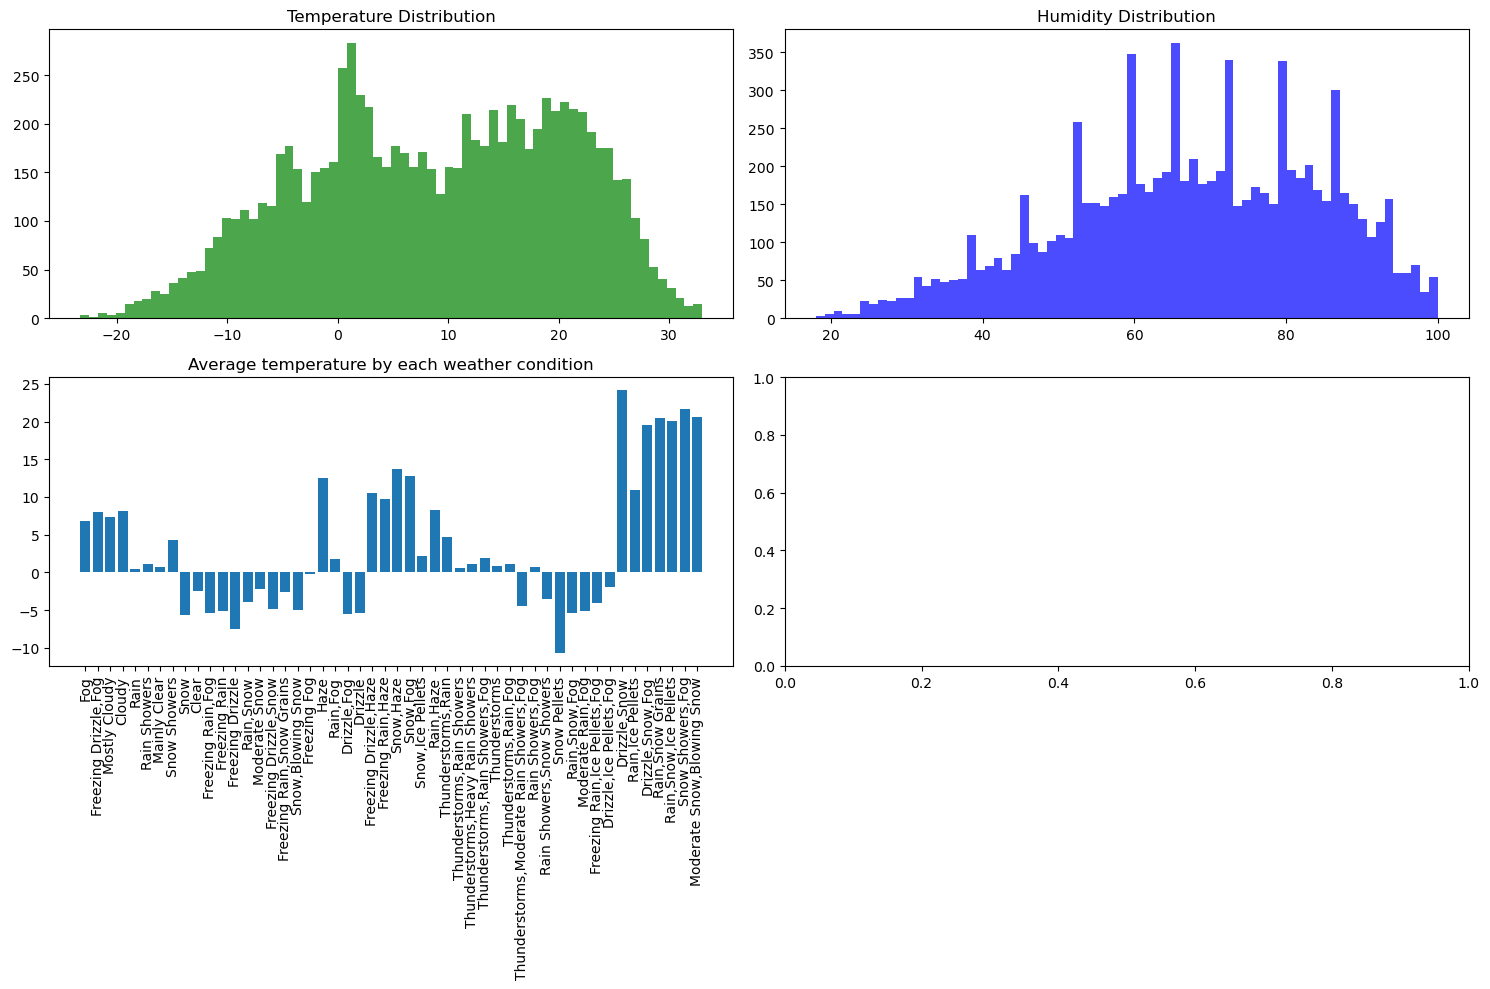

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))


# Temperature histogram 
ax1.hist(data['temp'], bins = 70, color = 'green', alpha = 0.7)
ax1.set_title('Temperature Distribution')


# Humidity histogram 
ax2.hist(data['rel_hum'], bins = 70, color = 'blue', alpha = 0.7)
ax2.set_title('Humidity Distribution')


mean = data.groupby('weather')['temp'].mean()
ax3.bar(range(len(mean)), mean)
ax3.set_xticks(range(len(mean)))
ax3.set_xticklabels(data['weather'].unique(), rotation = 90)
ax3.set_title('Average temperature by each weather condition')



plt.tight_layout()
plt.show()


In [ ]:
original_columns = ['date', 'temp', 'dew_point_temp', 'rel_hum', 'wind_speed', 'visibility_km', 'press_kpa', 'weather']
data = data[original_columns]
